In [1]:
from experiments.evaluation_result_container import EvaluationResultContainer
import json
from visualization import mk_bar_plot, mk_bar_plt_omit_empty
import re
from experiments.evaluation_statistics import aggregate_by_exp_type
from experiments.metric import MetricTemplate,Flags, Metric
import matplotlib.pyplot as plt
from experiments.experiment_type import ExperimentType

(4, 64)


# Experiment 1

In [2]:
E1 = EvaluationResultContainer.from_json("saved_data/eval_results/merged/E1.json")
# avrg over repetitions
E1 = aggregate_by_exp_type(E1)
# put E_1_1 to the end
E1.append_results(E1.pop(0))

Text(0.5, 0, 'Percentage of data used for training')

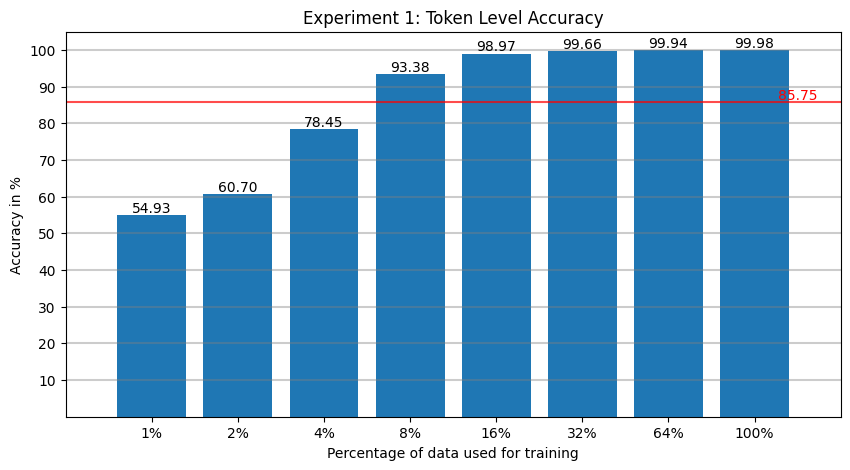

In [3]:
#TL ACC AVRG NO_ORACLE
acc_tl_outlen = MetricTemplate(flags=[
    Flags.LevelFlags.TL,
    Flags.MetricFlags.ACC,
    Flags.DistrFlags.Avrg,
    Flags.PredictionFlags.NO_ORACLE,
])

fig2, ax = plt.subplots(1, 1, figsize=(10, 5))
ms:list[Metric] = (E1*100).get_data(acc_tl_outlen)
x_lbls = ['1%','2%','4%','8%','16%','32%','64%','100%']
mk_bar_plot(ax,ms,x_lbls=x_lbls)
ax.set_title("Experiment 1: Token Level Accuracy")
ax.set_ylabel("Accuracy in %")
ax.set_xlabel("Percentage of data used for training")

# Experiment 2

In [4]:
E2 = EvaluationResultContainer.from_json("saved_data/eval_results/merged/E2.json") 
E2 = aggregate_by_exp_type(E2)

### Token Level No oracle

Text(0.5, 0, 'Input length')

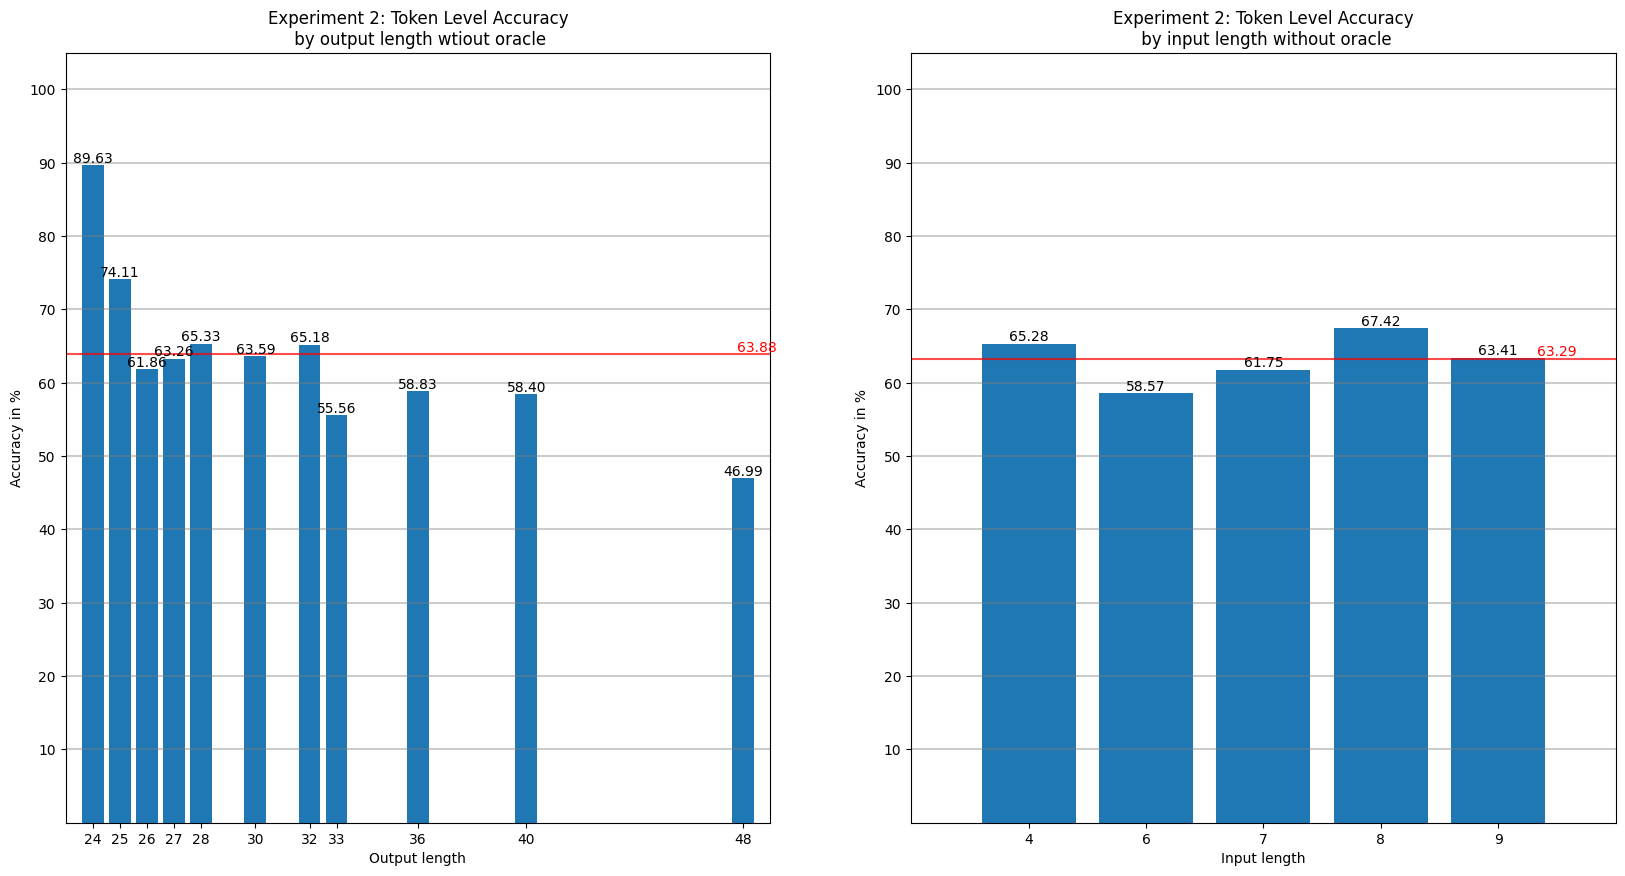

In [5]:
# ACC TL NO ORACLE OUTLEN
acc_tl_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])

fig1, axs1 = plt.subplots(1, 2, figsize=(20, 10))

data:Metric = (E2*100).get_data(acc_tl_outlen)[0]
mk_bar_plot(axs1[0],data=data, cut_trailing_zeros=True, omit_zero_lbls=True)
axs1[0].set_title("Experiment 2: Token Level Accuracy\n by output length wtiout oracle")
axs1[0].set_ylabel("Accuracy in %")
axs1[0].set_xlabel("Output length")

# ACC TL NO ORACLE INLEN
acc_tl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])

# TOTAL TL NO ORACLE INLEN
# used for removing empty bars in plots
tot_tl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])


data:Metric = (E2*100).get_data(acc_tl_inlen)[0]
total:Metric = E2.get_data(tot_tl_inlen)[0]
mk_bar_plt_omit_empty(axs1[1],data_metric=data,total_metric=total, cut_trailing_zeros=True)
axs1[1].set_title("Experiment 2: Token Level Accuracy\n by input length without oracle")
axs1[1].set_ylabel("Accuracy in %")
axs1[1].set_xlabel("Input length")





### Token Level With Oracle

Text(0.5, 0, 'Input length')

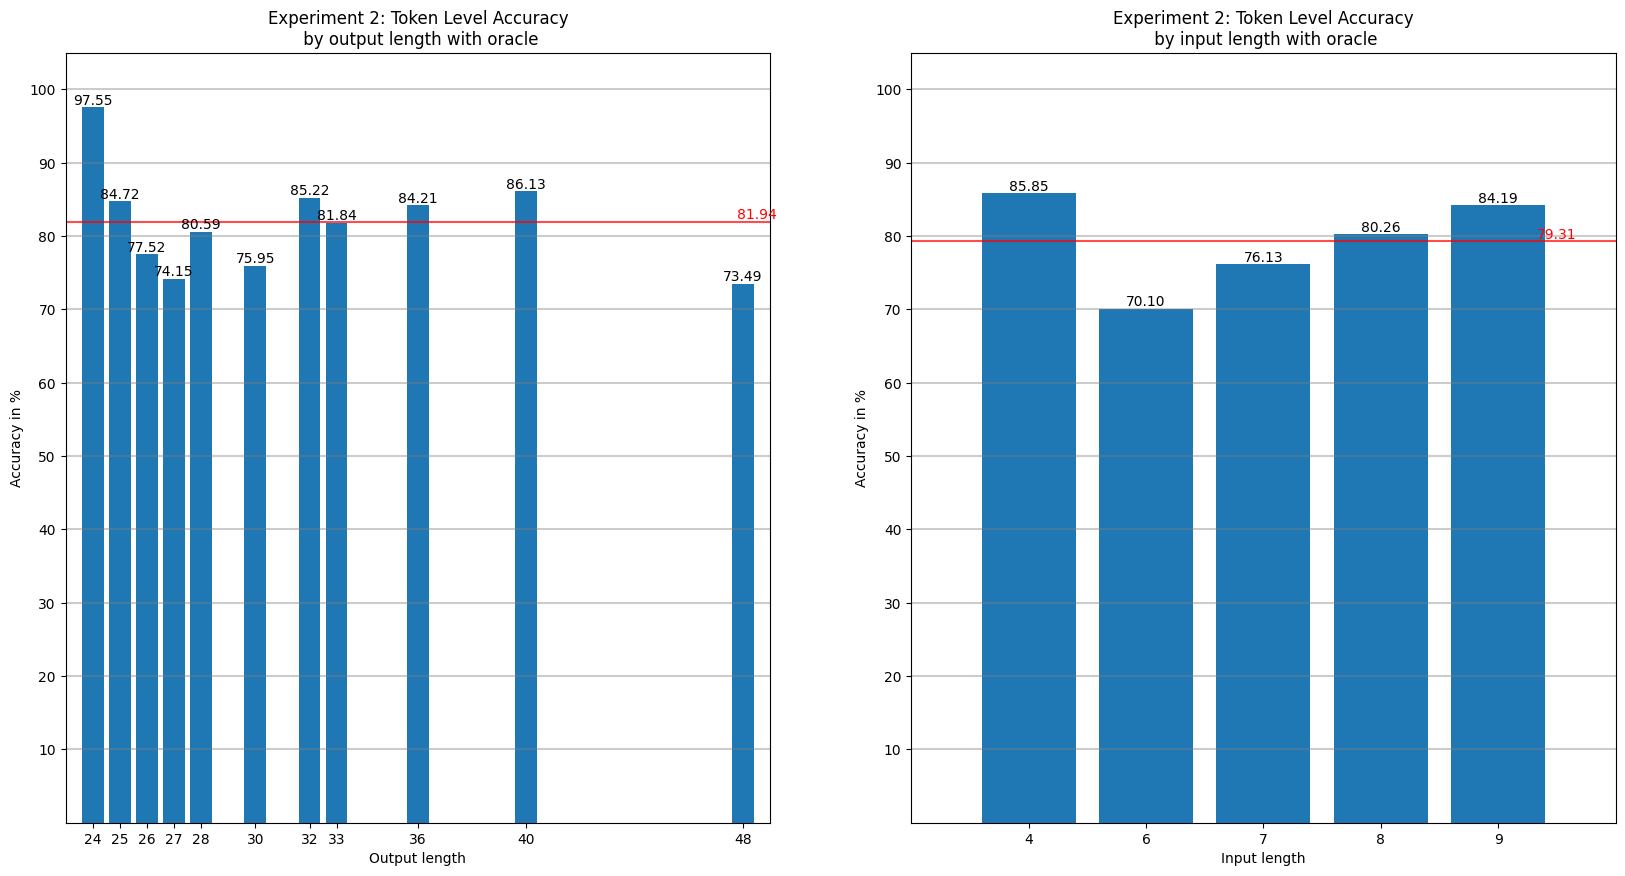

In [6]:
fig2, axs2 = plt.subplots(1, 2, figsize=(20, 10))

# ACC TL ORACLE OUTLEN
acc_tl_orac_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.ORACLE,
        ])
data:Metric = (E2*100).get_data(acc_tl_orac_outlen)[0]
mk_bar_plot(axs2[0],data=data, cut_trailing_zeros=True, omit_zero_lbls=True)
axs2[0].set_title("Experiment 2: Token Level Accuracy\n by output length with oracle")
axs2[0].set_ylabel("Accuracy in %")
axs2[0].set_xlabel("Output length")



# ACC TL ORACLE INLEN
acc_tl_orac_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

# TOTAL TL ORACLE INLEN
# used for removing empty bars in plots
tot_tl_orac_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

data:Metric = (E2*100).get_data(acc_tl_orac_inlen)[0]
total:Metric = E2.get_data(tot_tl_orac_inlen)[0]
mk_bar_plt_omit_empty(axs2[1],data_metric=data,total_metric=total, cut_trailing_zeros=True)
axs2[1].set_title("Experiment 2: Token Level Accuracy\n by input length with oracle")
axs2[1].set_ylabel("Accuracy in %")
axs2[1].set_xlabel("Input length")





### Sequence Level With Oracle

Text(0.5, 0, 'Input length')

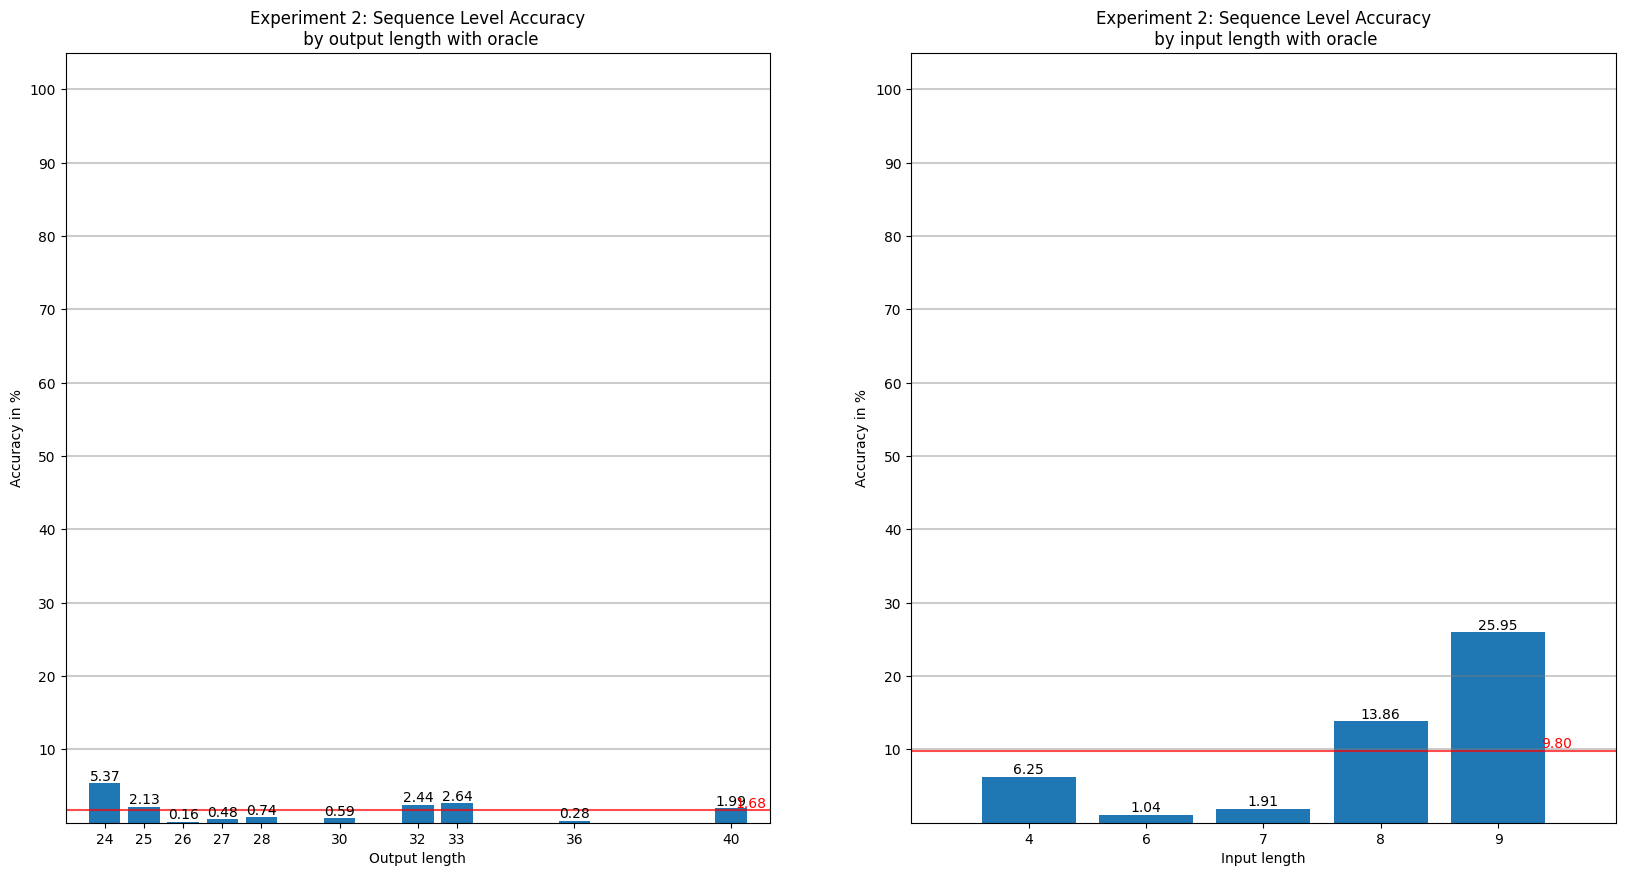

In [7]:
fig3, axs3 = plt.subplots(1, 2, figsize=(20, 10))

# ACC SL ORACLE OUTLEN
acc_sl_orac_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.ORACLE,
        ])
data:Metric = (E2*100).get_data(acc_sl_orac_outlen)[0]
mk_bar_plot(axs3[0],data=data, cut_trailing_zeros=True, omit_zero_lbls=True)
axs3[0].set_title("Experiment 2: Sequence Level Accuracy\n by output length with oracle")
axs3[0].set_ylabel("Accuracy in %")
axs3[0].set_xlabel("Output length")



# ACC SL ORACLE INLEN
acc_sl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

# TOTAL SL ORACLE INLEN
# used for removing empty bars in plots
tot_sl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

data:Metric = (E2*100).get_data(acc_sl_inlen)[0]
total:Metric = E2.get_data(tot_sl_inlen)[0]
mk_bar_plt_omit_empty(axs3[1],data_metric=data,total_metric=total, cut_trailing_zeros=True)
axs3[1].set_title("Experiment 2: Sequence Level Accuracy\n by input length with oracle")
axs3[1].set_ylabel("Accuracy in %")
axs3[1].set_xlabel("Input length")
